In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [4]:
df =pd.read_csv(file_path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [6]:
# PREGUNTA 1, CUAL ES EL TIPO DE DATOS DE LA COLUMNA "pek-rpm"?
df["peak-rpm"].dtype

dtype('float64')

In [7]:
# PREGUNTA 2, ENCUENTRE LA CORRELACION ENTRE LAS VARIALES'bore', 'stroke', 'compression-ratio', 'horsepower'
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53455.43746450793)

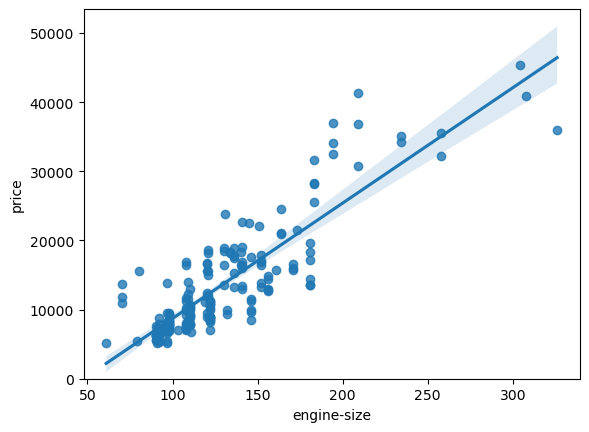

In [8]:
# Positive Linear Relationship
## El tamaño del motor como posible variable predictiva del precio
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

A medida que aumenta la cilindrada, aumenta el precio: esto indica una correlación directa positiva entre estas dos variables. La cilindrada parece un buen indicador del precio, ya que la línea de regresión es casi una diagonal perfecta.

In [10]:
#Revisemos la estadistica, y busquemos la correlacion entre las 2 variables 
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Ya que vemos que el valor de acerca a uno podemos decir que las variables estan altamente correlacionadas de manera positiva

<Axes: xlabel='highway-mpg', ylabel='price'>

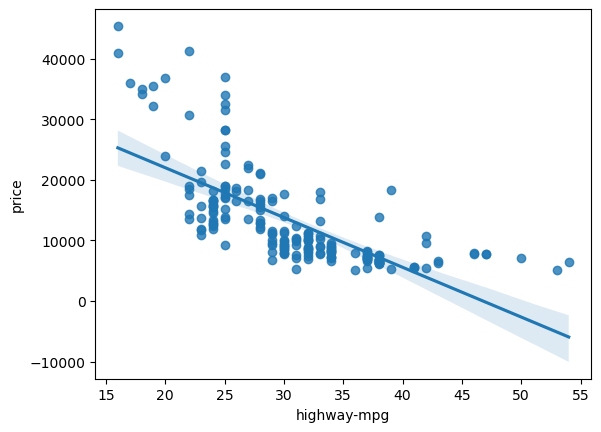

In [12]:
#Realicemos el mismo ejercicio pero ahora con la variable precio y higway-mpg
sns.regplot(x="highway-mpg", y="price", data=df)

In [13]:
#y revisamos la estadistica 
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Ya que vemos que el valor de acerca a menos uno podemos decir que las variables estan altamente correlacionadas de manera negativa

<Axes: xlabel='peak-rpm', ylabel='price'>

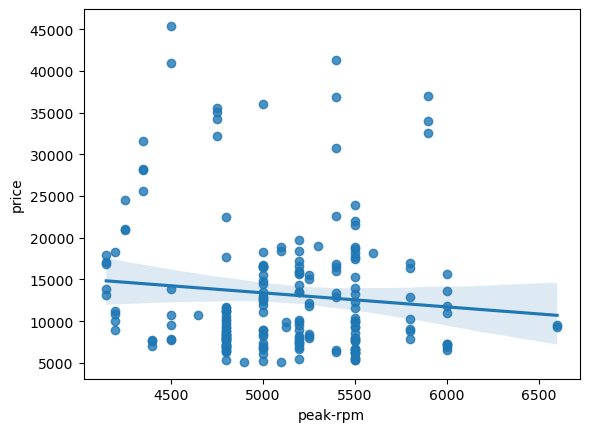

In [15]:
# revisemos esta otra 
sns.regplot(x="peak-rpm", y="price", data=df)

In [16]:
# Y la estadistica
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


El pico de revoluciones no parece en absoluto un buen predictor del precio, ya que la línea de regresión se aproxima a la horizontal. Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, lo que muestra mucha variabilidad. Por lo tanto, no es una variable fiable.

## **Variables categóricas**

Se trata de variables que describen una «característica» de una unidad de datos y se seleccionan entre un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo «object» o «int64». Una buena forma de visualizar las variables categóricas es mediante boxplots.

<Axes: xlabel='body-style', ylabel='price'>

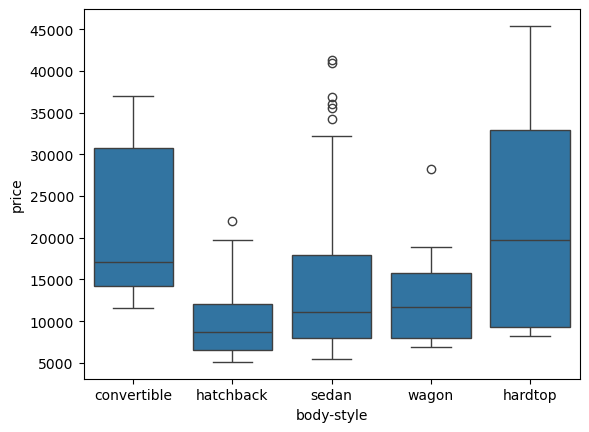

In [19]:
#Vemos que las distribuciones de precios entre las distintas categorías de carrocería se solapan de forma significativa, 
## por lo que el estilo de carrocería no sería un buen indicador del precio.
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

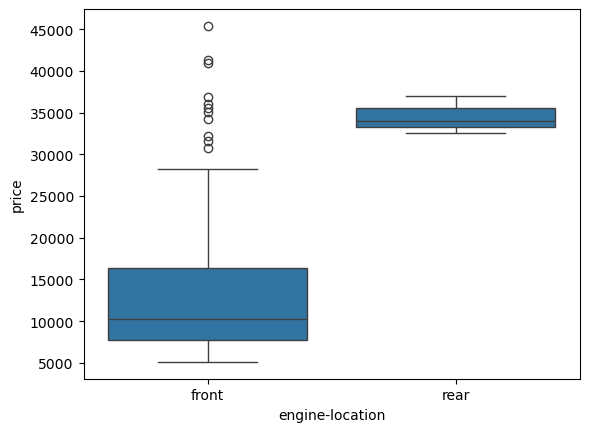

In [20]:
# Aquí vemos que la distribución del precio entre estas dos categorías de ubicación del motor, delantero y trasero, 
## son lo suficientemente distintas como para tomar la ubicación del motor como un buen predictor potencial del precio.
sns.boxplot(x="engine-location", y="price", data=df)

**Conceptos básicos de la agrupación**
El método «groupby» agrupa los datos por diferentes categorías. Los datos se agrupan en función de una o varias variables, y el análisis se realiza en los grupos individuales.

Por ejemplo, agrupemos por la variable "drive_wheels. Vemos que hay 3 categorías diferentes de ruedas motrices

In [39]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [43]:
#Si queremos saber, por término medio, qué tipo de drive wheels es más valioso, podemos agrupar "drive_wheels" y 
##luego hacer la media.
###Podemos seleccionar las columnas"drive_wheels", "body-style" y "price", y luego asignarlo a la variable "df_group_one".

df_group_one = df[['drive-wheels','body-style','price']]

In [47]:
# y realizamos el calculo de la media del precio
df_grouped = df_group_one.groupby(['drive-wheels'], as_index=False).agg({'price': 'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Según nuestros datos, parece que los vehículos de tracción trasera son, de media, los más caros, mientras que los de 4 ruedas y los de tracción delantera tienen aproximadamente el mismo precio.

También puedes agrupar por múltiples variables. Por ejemplo, agrupemos por "drive_wheels y "body-style". Esto agrupa el marco de datos por la combinación única de "drive_wheels y "body-style. Podemos almacenar los resultados en la variable «grouped_test1».


In [50]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica. Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el marco de datos en una tabla dinámica utilizando el método «pivot» para crear una tabla dinámica a partir de los grupos.

En este caso, dejaremos la variable «drive-wheels» como las filas de la tabla, y «pivot body-style» para convertirse en las columnas de la tabla:

In [53]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [55]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

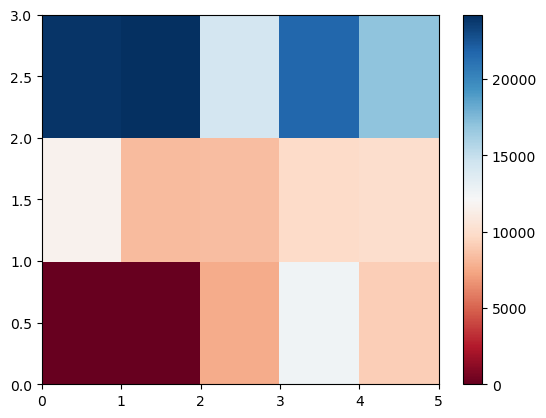

In [57]:
# Utilicemos un mapa de calor para visualizar la relación entre estilo de carrocería y precio.
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

El mapa de calor muestra la variable objetivo (precio) proporcional al color con respecto a las variables "drive_wheels" y "body_type" en los ejes vertical y horizontal, respectivamente. Esto nos permite visualizar la relación entre el precio y las variables "drive_wheels" y "body_type"

Las etiquetas por defecto no nos transmiten ninguna información útil. Cambiémoslas:

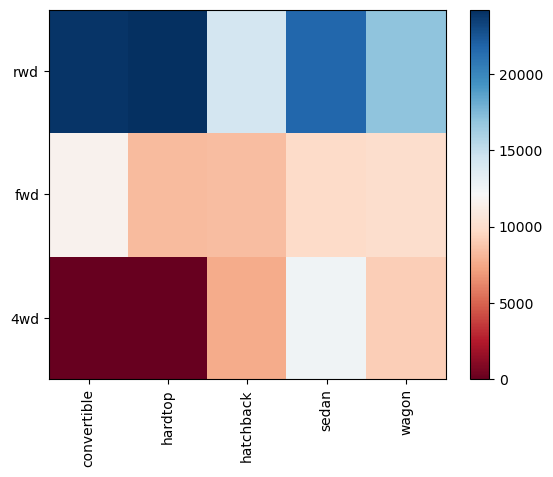

In [62]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlación y causalidad

Correlación: medida del grado de interdependencia entre variables.

Causalidad: relación de causa a efecto entre dos variables.

Es importante conocer la diferencia entre ambas. La correlación no implica causalidad. Determinar la correlación es mucho más sencillo que determinar la causalidad, ya que la causalidad puede requerir una experimentación independiente.

Correlación de Pearson

La Correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor comprendido entre -1 y 1 inclusive, donde:

1: Correlación lineal positiva perfecta.
0: Sin correlación lineal, lo más probable es que las dos variables no se afecten mutuamente.
-1: Correlación lineal negativa perfecta.
La correlación de Pearson es el método por defecto de la función «corr». Como antes, podemos calcular la Correlación de Pearson de las variables 'int64' o 'float64'.

In [67]:
df.select_dtypes(include=['number']).corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


**P-value**

¿Qué es el valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significación de 0,05, lo que significa que tenemos un 95% de confianza en que la correlación entre las variables es significativa.

Por convención, cuando el

valor p es 
 0,001: decimos que hay pruebas sólidas de que la correlación es significativa.
cuando el valor p es 
 0,05: hay pruebas moderadas de que la correlación es significativa.
el valor p es 
 0,1: hay pruebas débiles de que la correlación es significativa.
El valor p es 
 0,1: no hay pruebas de que la correlación sea significativa.






Podemos obtener esta información utilizando el módulo «stats» de la biblioteca «scipy».

In [71]:
from scipy import stats

In [73]:
# Wheel-Base vs. Price
## Calculemos el coeficiente de correlación de Pearson y el valor P
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732552e-20


Dado que el valor p es < 0,001, la correlación entre la distancia entre ejes y el precio es estadísticamente significativa, aunque la relación lineal no es muy fuerte (~0,585).

In [76]:
# Horsepower vs. Price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8095745670036555  with a P-value of P =  6.369057428260919e-48


Dado que el valor p es <0,001, la correlación entre potencia y precio es estadísticamente significativa, y la relación lineal es bastante fuerte (~0,809, cercana a 1).

In [79]:
# Length vs. Price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.6906283804483644  with a P-value of P =  8.016477466158383e-30


Dado que el valor p es< 0,001, la correlación entre longitud y precio es estadísticamente significativa, y la relación lineal es moderadamente fuerte (~0,691).

In [82]:
#Width vs. Price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522665  with a P-value of P = 9.200335510484122e-38


Como el valor p es < 0,001, la correlación entre anchura y precio es estadísticamente significativa, y la relación lineal es bastante fuerte (~0,751).

**Conclusiones:**
Variables importantes

Ahora tenemos una mejor idea de cómo son nuestros datos y qué variables son importantes tener en cuenta a la hora de predecir el precio del coche. Lo hemos reducido a las siguientes variables:


**Variables numéricas continuas**

* Longitud
* Anchura
* Peso en vacío
* Tamaño del motor
* Potencia
* Consumo en ciudad
* Consumo en carretera
* Distancia entre ejes
* Diámetro

**Variables categóricas:**

Drive_wheels
A medida que avanzamos en la creación de modelos de aprendizaje automático para automatizar nuestro análisis, alimentar el modelo con variables que afecten significativamente a nuestra variable objetivo mejorará el rendimiento de predicción de nuestro modelo.